In [29]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
from rdkit.Chem import PandasTools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot
import matplotlib


Load the data

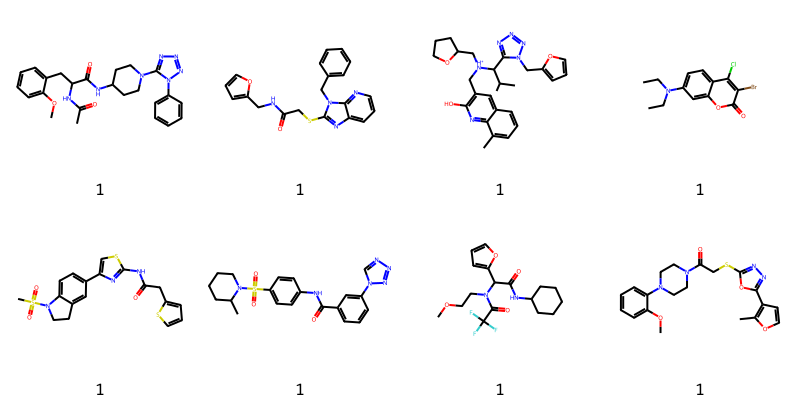

In [34]:
filepath = 'Data/tested_molecules-1.csv'

esol_data = pd.read_csv(filepath)

PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='SMILES')

PandasTools.FrameToGridImage(esol_data.head(8), legendsCol="ALDH1_inhibition", molsPerRow=4)

Description of all the attributes:  https://www.rdkit.org/docs/RDKit_Book.html#additional-information-about-the-fingerprints

Add new attributes

In [35]:
esol_data['n_Atoms'] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data['MolLogP'] = esol_data['ROMol'].apply(Descriptors.MolLogP)
esol_data['HeavyAtomCount'] = esol_data['ROMol'].apply(Descriptors.HeavyAtomCount)
esol_data['HAccept'] = esol_data['ROMol'].apply(Descriptors.NumHAcceptors)
esol_data['Heteroatoms'] = esol_data['ROMol'].apply(Descriptors.NumHeteroatoms)
esol_data['HDonor'] = esol_data['ROMol'].apply(Descriptors.NumHDonors)
esol_data['MolWt'] = esol_data['ROMol'].apply(Descriptors.MolWt)
esol_data['RotableBonds'] = esol_data['ROMol'].apply(Descriptors.NumRotatableBonds)
esol_data['RingCount'] = esol_data['ROMol'].apply(Descriptors.RingCount)
esol_data['Ipc'] = esol_data['ROMol'].apply(Descriptors.Ipc)
esol_data['HallKierAlpha'] = esol_data['ROMol'].apply(Descriptors.HallKierAlpha)
esol_data['NumValenceElectrons'] = esol_data['ROMol'].apply(Descriptors.NumValenceElectrons)
esol_data['SaturatedRings'] = esol_data['ROMol'].apply(Descriptors.NumSaturatedRings)
esol_data['AliphaticRings'] = esol_data['ROMol'].apply(Descriptors.NumAliphaticRings)
esol_data['AromaticRings'] = esol_data['ROMol'].apply(Descriptors.NumAromaticRings)
esol_data['Heterocycles'] = esol_data['ROMol'].apply(Descriptors.NumAromaticHeterocycles)
esol_data['AmideBonds'] = [AllChem.CalcNumAmideBonds(x) for x in esol_data['ROMol']]
esol_data['LipinskiHBA'] = [AllChem.CalcNumLipinskiHBA(x) for x in esol_data['ROMol']]
esol_data['LipinskiHBD'] = [AllChem.CalcNumLipinskiHBD(x) for x in esol_data['ROMol']]

esol_data.head()


,SMILES,ALDH1_inhibition,ROMol,n_Atoms,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,...,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,<rdkit.Chem.rdchem.Mol object at 0x00000244D0D...,34,1.50330,34,8,10,2,463.542,...,6.958111e+07,-3.95,178,1,1,3,1,2,10,2
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,<rdkit.Chem.rdchem.Mol object at 0x00000244D0D...,27,3.48110,27,6,7,1,378.457,...,3.137659e+06,-3.06,136,0,0,4,3,1,6,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,<rdkit.Chem.rdchem.Mol object at 0x00000244D0D...,35,2.83782,35,8,9,2,477.589,...,1.436707e+08,-3.30,184,1,1,4,3,0,9,2
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,<rdkit.Chem.rdchem.Mol object at 0x00000244D0D...,18,4.05510,18,3,5,0,330.609,...,1.207136e+04,-1.00,96,0,0,2,1,0,3,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,<rdkit.Chem.rdchem.Mol object at 0x00000244D0D...,27,3.37490,27,6,9,1,419.553,...,1.948182e+06,-2.23,140,0,1,3,2,1,6,1


In [36]:
scaler = MinMaxScaler()

st_data = esol_data.copy().drop(['ROMol','SMILES','ALDH1_inhibition'], axis=1)

st_data = (st_data - st_data.mean()) / st_data.std()

st_data.head()

,n_Atoms,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,1.797123,-0.745378,1.797123,1.664185,1.452667,0.932897,1.513763,1.507489,1.055941,0.604526,-1.866199,1.796067,0.637231,0.270232,0.907581,0.166516,1.262925,2.084613,0.669387
1,0.523471,0.681899,0.523471,0.623744,0.109677,-0.195153,0.421064,1.052467,1.055941,-0.114505,-0.769899,0.335907,-0.655327,-0.837276,1.976580,2.597405,0.144302,0.104453,-0.273412
2,1.979074,0.217677,1.979074,1.664185,1.005004,0.932897,1.694161,1.962511,2.022036,1.406300,-1.065530,2.004662,0.637231,0.270232,1.976580,2.597405,-0.974320,1.589573,0.669387
3,-1.114082,1.096125,-1.114082,-0.936917,-0.785649,-1.323202,-0.193421,-0.767623,-0.876248,-0.148329,1.767606,-1.054723,-0.655327,-0.837276,-0.161419,0.166516,-0.974320,-1.380666,-1.216210
4,0.523471,0.605260,0.523471,0.623744,1.005004,-0.195153,0.948837,0.142422,1.055941,-0.127377,0.252494,0.474969,-0.655327,0.270232,0.907581,1.381961,0.144302,0.104453,-0.273412


Make decomposition

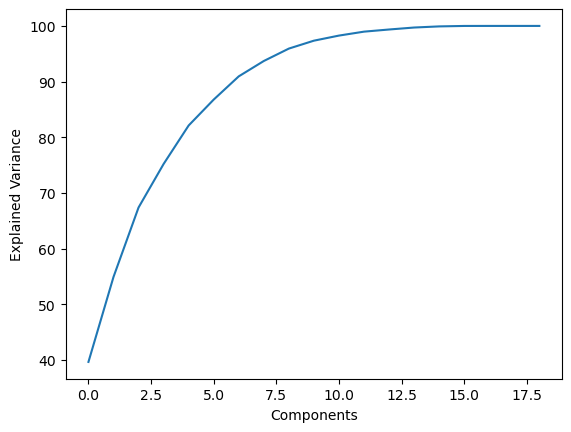

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,label
0,5.424308,1.096761,1.170648,0.275167,-0.201050,-0.311952,0.441398,-0.433424,-0.692812,0.208102,-0.182861,-0.122353,0.250122,-0.090108,0.026266,-0.032659,0.021201,3.098648e-15,4.079966e-16,1
1,2.162823,-2.683567,0.242780,-0.328474,-1.175202,-0.407828,-0.192378,1.174050,-1.165275,0.035803,0.231334,-0.097135,-0.149987,0.008023,0.065489,0.056358,-0.010753,-6.763877e-16,3.868645e-17,1
2,5.921665,-0.839158,0.238410,0.142464,-1.997986,1.518555,-1.084089,0.843511,-1.102985,0.285996,0.055142,0.188176,-0.120640,-0.292180,-0.239885,-0.052883,-0.003300,5.080270e-17,8.989628e-18,1
3,-3.173258,-1.836925,-1.149210,-0.104183,0.895738,0.552614,-0.374374,1.001177,0.669414,-0.620190,-0.132396,-0.045060,0.140868,0.013214,-0.228738,0.385805,0.054348,3.505077e-16,-4.077263e-17,1
4,1.892322,-1.164719,-0.330655,0.226321,-0.668004,-0.293246,-0.361242,0.960865,0.454871,-0.710891,0.649974,-0.414599,-0.169152,-0.022091,0.122584,0.020316,0.006584,-1.927436e-15,8.664753e-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.317742,3.064808,-0.841133,0.788234,-0.412379,-0.771138,0.662478,-0.229796,-1.162770,0.166611,-0.282282,-0.458731,-0.014665,0.706148,-0.053540,0.004065,-0.001465,3.817971e-17,8.241250e-18,0
996,-2.090913,-1.325195,0.630187,0.151785,0.279809,0.508528,-0.039848,-0.131897,-0.256870,0.942417,0.059861,0.069751,-0.102477,-0.096207,0.067656,0.044864,-0.001098,3.792931e-17,1.554950e-17,0
997,-3.966868,-0.448281,1.005556,0.062267,-0.773281,-0.162410,1.001832,-0.140076,-0.816037,0.094166,-0.000608,-0.117373,-0.018809,0.553302,-0.126988,-0.012362,0.010678,1.275389e-16,-2.901328e-17,0
998,3.077588,-1.758167,1.933044,2.903859,-0.832897,-0.370017,0.376979,0.845572,0.064935,-0.184061,0.244722,0.361196,0.356780,-0.203003,-0.073860,-0.067503,0.021806,-5.288720e-17,1.590028e-17,0


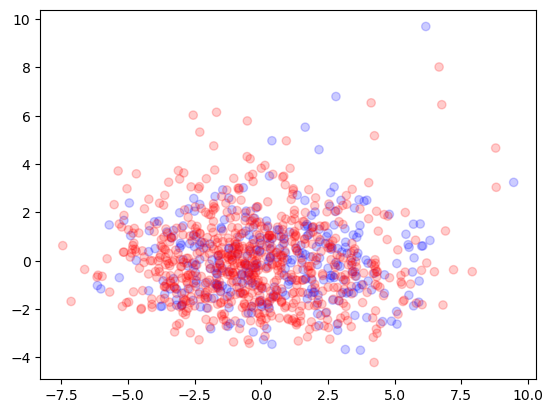

In [41]:
pca = PCA(n_components= st_data.shape[1])
components = pca.fit_transform(st_data)

loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(st_data.columns))],
index=st_data.columns)



components_Df = pd.DataFrame(data = components)
components_Df['label'] = esol_data['ALDH1_inhibition']

plot.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

colors = ['red', 'blue']

plot.scatter(components_Df[0], components_Df[1],
             c = components_Df['label'],
             cmap=matplotlib.colors.ListedColormap(colors),
             alpha= 0.2)


components_Df


Project data onto principal components.